In [ ]:
import pandas as pd
import numpy as np 
!pip install Twython
from twython import Twython
CONSUMER_KEY = "f7RkCP05ax6m5R75e7NEROblP"
CONSUMER_SECRET = "zXiRP1rQBy9d2bDuAFpwD98zzkmslML769iY0jhLDjpH88dmfM"
OAUTH_TOKEN = "994129208233295872-BdzZ761Mi4hxjWK2kRno4Fx3mlOd0wH"
OAUTH_TOKEN_SECRET = "E3HfihiBifLdCWOaoudr5hbJUdduovpTIFjRyAqC9nGs3"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)


In [ ]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='STsiodras',count=300, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    tweetsL.append(tweet)
    
for tweet in tweetsL:
    if (len(tweet['full_text'])) > 50:
        print(tweet['full_text'], '\n')
all_text = ''
for tweet in tweetsL :
  all_text = all_text + ' ' + tweet['full_text']
len(all_text)

I Got: 166  tweets
@To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε 1000 τετ μέτρα - αυτός είναι ο ρατσισμός για τον οποίο μιλάω κι εσείς αγαπητέ φίλε δεν καταλαβαίνετε 

RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσης του κορονοϊού. Επιδεικνύουμε ατομική ευθύνη και ακολουθούμε αυστηρά τις οδηγίες. Δεν συνωσ… 

Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος και υγιής - δώσε αίμα - να μην αντιμετωπίσουμε ελλείψεις https://t.co/izldT0dEl1 

Και μια αναφορά στα μέσα για το νέο φάρμακο από #China  https://t.co/xFQhQcrgfA 

RT @RiganoESQ: @elonmusk Update: As per @DiderRaoult - the study shows combination of HCQ * Azithromycin is most effective treatment 

1 co… 

RT @RiganoESQ: @elonmusk I am co-author of the original paper.

Was just on television discussing HCQ, first well controlled study against… 

RT @elonmusk: Hydroxychloroquine probably better
https://t.co/FWn2kh1LZx https://t.co/wQODHiFeWT 

Νεότερα για το θέμα των μη στεροειδών αντιφλεγμονωδών φαρμάκων - still not enough data https

20551

In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Sun Mar 22 10:01:59 +0000 2020 @To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε 1000 τετ μέτρα - αυτός είναι ο ρατσισμός για τον οποίο μιλάω κι εσείς αγαπητέ φίλε δεν καταλαβαίνετε
Fri Mar 20 15:24:02 +0000 2020 RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσης του κορονοϊού. Επιδεικνύουμε ατομική ευθύνη και ακολουθούμε αυστηρά τις οδηγίες. Δεν συνωσ…
Thu Mar 19 18:16:01 +0000 2020 Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος και υγιής - δώσε αίμα - να μην αντιμετωπίσουμε ελλείψεις https://t.co/izldT0dEl1
Wed Mar 18 17:23:28 +0000 2020 Και μια αναφορά στα μέσα για το νέο φάρμακο από #China  https://t.co/xFQhQcrgfA
Wed Mar 18 10:25:48 +0000 2020 RT @RiganoESQ: @elonmusk Update: As per @DiderRaoult - the study shows combination of HCQ * Azithromycin is most effective treatment 

1 co…
Wed Mar 18 10:25:17 +0000 2020 RT @RiganoESQ: @elonmusk I am co-author of the original paper.

Was just on television discussing HCQ, first well controlled study against…
Wed Mar 18 10:24:34 +0000 2020 RT @e

In [ ]:
import nltk #για Επεξεργασία φυσικής γλώσσας Natural Language Toolkit

import matplotlib.pyplot as plt #Για γραφικά
import wordcloud #Για word clouds
import numpy as np 
import scipy #Για διαφορές και αποστάσεις
import seaborn as sns #κάνει τα γραφήματα (plot) πιο όμορφα
import sklearn.manifold #Για manifold plot
from nltk.corpus import stopwords #Για stopwords
import json #Για API responses
import urllib.parse #Για ένωση urls

%matplotlib inline

from textblob import TextBlob


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
tweets_df = pd.DataFrame(tweetsL)
tweets_df.head()
 

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Mar 22 10:01:59 +0000 2020,1241666424688517121,1241666424688517121,@To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε...,False,"[17, 147]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.241657e+18,1241656623577341953,3.321322e+09,3321321664,To_pouli_tou_Ro,"{'id': 976133904091533312, 'id_str': '97613390...",None,None,None,None,False,503,2699,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Mar 20 15:24:02 +0000 2020,1241022696500146178,1241022696500146178,RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 976133904091533312, 'id_str': '97613390...",None,None,None,None,False,1359,0,False,False,el,{'created_at': 'Fri Mar 20 14:32:43 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Mar 19 18:16:01 +0000 2020,1240703588646547456,1240703588646547456,Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος...,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 976133904091533312, 'id_str': '97613390...",None,None,None,None,False,1676,4307,False,False,el,NaN,False,NaN,NaN,NaN,NaN,NaN
3,Wed Mar 18 17:23:28 +0000 2020,1240327977382088704,1240327977382088704,Και μια αναφορά στα μέσα για το νέο φάρμακο απ...,False,"[0, 79]","{'hashtags': [{'text': 'China', 'indices': [48...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 976133904091533312, 'id_str': '97613390...",None,None,None,None,False,1020,2498,False,False,el,NaN,False,NaN,NaN,NaN,NaN,NaN
4,Wed Mar 18 10:25:48 +0000 2020,1240222868211933184,1240222868211933184,RT @RiganoESQ: @elonmusk Update: As per @Dider...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 976133904091533312, 'id_str': '97613390...",None,None,None,None,False,1005,0,False,False,en,{'created_at': 'Tue Mar 17 19:43:48 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweetsL[1]['full_text']



'RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσης του κορονοϊού. Επιδεικνύουμε ατομική ευθύνη και ακολουθούμε αυστηρά τις οδηγίες. Δεν συνωσ…'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
tweets_df.to_csv("/gdrive/My Drive/Colab Notebooks/Tsiodras.tsv", sep='\t')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
tweets_df2 =pd.read_csv("/gdrive/My Drive/Colab Notebooks/Tsiodras.tsv", sep='\t')


In [ ]:
L_tweets = tweets_df2.to_dict('records')


In [ ]:
L_short_tweets = []

for tweet in L_tweets:
    date = tweet['created_at']
    text = tweet['full_text']
    short_tweet = {'date': date, 'text':text, 'user': 'STsiodras'}
    L_short_tweets.append(short_tweet)

L_short_tweets[0:5]


[{'date': 'Sun Mar 22 10:01:59 +0000 2020',
  'text': '@To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε 1000 τετ μέτρα - αυτός είναι ο ρατσισμός για τον οποίο μιλάω κι εσείς αγαπητέ φίλε δεν καταλαβαίνετε',
  'user': 'STsiodras'},
 {'date': 'Fri Mar 20 15:24:02 +0000 2020',
  'text': 'RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσης του κορονοϊού. Επιδεικνύουμε ατομική ευθύνη και ακολουθούμε αυστηρά τις οδηγίες. Δεν συνωσ…',
  'user': 'STsiodras'},
 {'date': 'Thu Mar 19 18:16:01 +0000 2020',
  'text': 'Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος και υγιής - δώσε αίμα - να μην αντιμετωπίσουμε ελλείψεις https://t.co/izldT0dEl1',
  'user': 'STsiodras'},
 {'date': 'Wed Mar 18 17:23:28 +0000 2020',
  'text': 'Και μια αναφορά στα μέσα για το νέο φάρμακο από #China  https://t.co/xFQhQcrgfA',
  'user': 'STsiodras'},
 {'date': 'Wed Mar 18 10:25:48 +0000 2020',
  'text': 'RT @RiganoESQ: @elonmusk Update: As per @DiderRaoult - the study shows combination of HCQ * Azithromycin is most effective t

In [ ]:
short_tweets = pd.DataFrame(L_short_tweets)

short_tweets.tail()


,date,text,user
161,Thu Jan 23 19:25:20 +0000 2020,"RT @WHO: @DrTedros ""We know that this virus ca...",STsiodras
162,Thu Jan 23 19:25:13 +0000 2020,"RT @WHO: @DrTedros ""We know that most of those...",STsiodras
163,Thu Jan 23 18:13:18 +0000 2020,Remarkable delay shows uncertainty and more qu...,STsiodras
164,Thu Jan 23 17:07:48 +0000 2020,@WHO @DrTedros @WHOWPRO @WHOSEARO @pahowho @WH...,STsiodras
165,Fri Oct 04 19:48:31 +0000 2019,#WhyIVaccinate For the protection of all from ...,STsiodras


In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets.head()


,date,text,user,year,month,day
0,2020-03-22 10:01:59,@To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε...,STsiodras,2020,3,22
1,2020-03-20 15:24:02,RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσ...,STsiodras,2020,3,20
2,2020-03-19 18:16:01,Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος...,STsiodras,2020,3,19
3,2020-03-18 17:23:28,Και μια αναφορά στα μέσα για το νέο φάρμακο απ...,STsiodras,2020,3,18
4,2020-03-18 10:25:48,RT @RiganoESQ: @elonmusk Update: As per @Dider...,STsiodras,2020,3,18


In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")
short_tweets['text']

0      @To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε...
1      RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσ...
2      Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος...
3      Και μια αναφορά στα μέσα για το νέο φάρμακο απ...
4      RT @RiganoESQ: @elonmusk Update: As per @Dider...
                             ...                        
161    RT @WHO: @DrTedros "We know that this virus ca...
162    RT @WHO: @DrTedros "We know that most of those...
163    Remarkable delay shows uncertainty and more qu...
164    @WHO @DrTedros @WHOWPRO @WHOSEARO @pahowho @WH...
165    #WhyIVaccinate For the protection of all from ...
Name: text, Length: 166, dtype: object

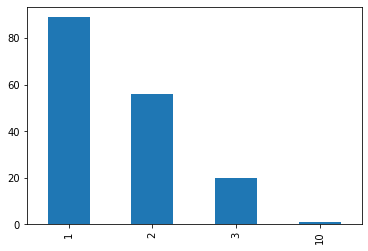

In [ ]:
short_tweets['month'].value_counts().plot(kind='bar')


In [ ]:
short_tweets[short_tweets['year']==2020]['text']


0      @To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε...
1      RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσ...
2      Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος...
3      Και μια αναφορά στα μέσα για το νέο φάρμακο απ...
4      RT @RiganoESQ: @elonmusk Update: As per @Dider...
                             ...                        
160    RT @WHO: @DrTedros "584 cases have now been re...
161    RT @WHO: @DrTedros "We know that this virus ca...
162    RT @WHO: @DrTedros "We know that most of those...
163    Remarkable delay shows uncertainty and more qu...
164    @WHO @DrTedros @WHOWPRO @WHOSEARO @pahowho @WH...
Name: text, Length: 165, dtype: object

In [ ]:
text = short_tweets[short_tweets['year']==2020]['text'].str.cat(sep = ' ').replace("amp", ' ')
text

'@To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε 1000 τετ μέτρα - αυτός είναι ο ρατσισμός για τον οποίο μιλάω κι εσείς αγαπητέ φίλε δεν καταλαβαίνετε RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσης του κορονοϊού. Επιδεικνύουμε ατομική ευθύνη και ακολουθούμε αυστηρά τις οδηγίες. Δεν συνωσ… Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος και υγιής - δώσε αίμα - να μην αντιμετωπίσουμε ελλείψεις   Και μια αναφορά στα μέσα για το νέο φάρμακο από #China    RT @RiganoESQ: @elonmusk Update: As per @DiderRaoult - the study shows combination of HCQ * Azithromycin is most effective treatment \n\n1 co… RT @RiganoESQ: @elonmusk I am co-author of the original paper.\n\nWas just on television discussing HCQ, first well controlled study against… RT @elonmusk: Hydroxychloroquine probably better\n  Νεότερα για το θέμα των μη στεροειδών αντιφλεγμονωδών φαρμάκων - still not enough data       RT @BBCWorld: Dutch Health Minister Bruno Bruins announces schools and crèches will be closed from Monday until 6 Ap

In [ ]:
tweet = text


TextBlob(tweet).sentiment


Sentiment(polarity=0.11600079073563925, subjectivity=0.4618968181089397)

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
stopwords = set(STOPWORDS) 
list(STOPWORDS)[0:10]

['how',
 'up',
 'were',
 'her',
 'as',
 "mustn't",
 'when',
 'since',
 'like',
 "you'll"]

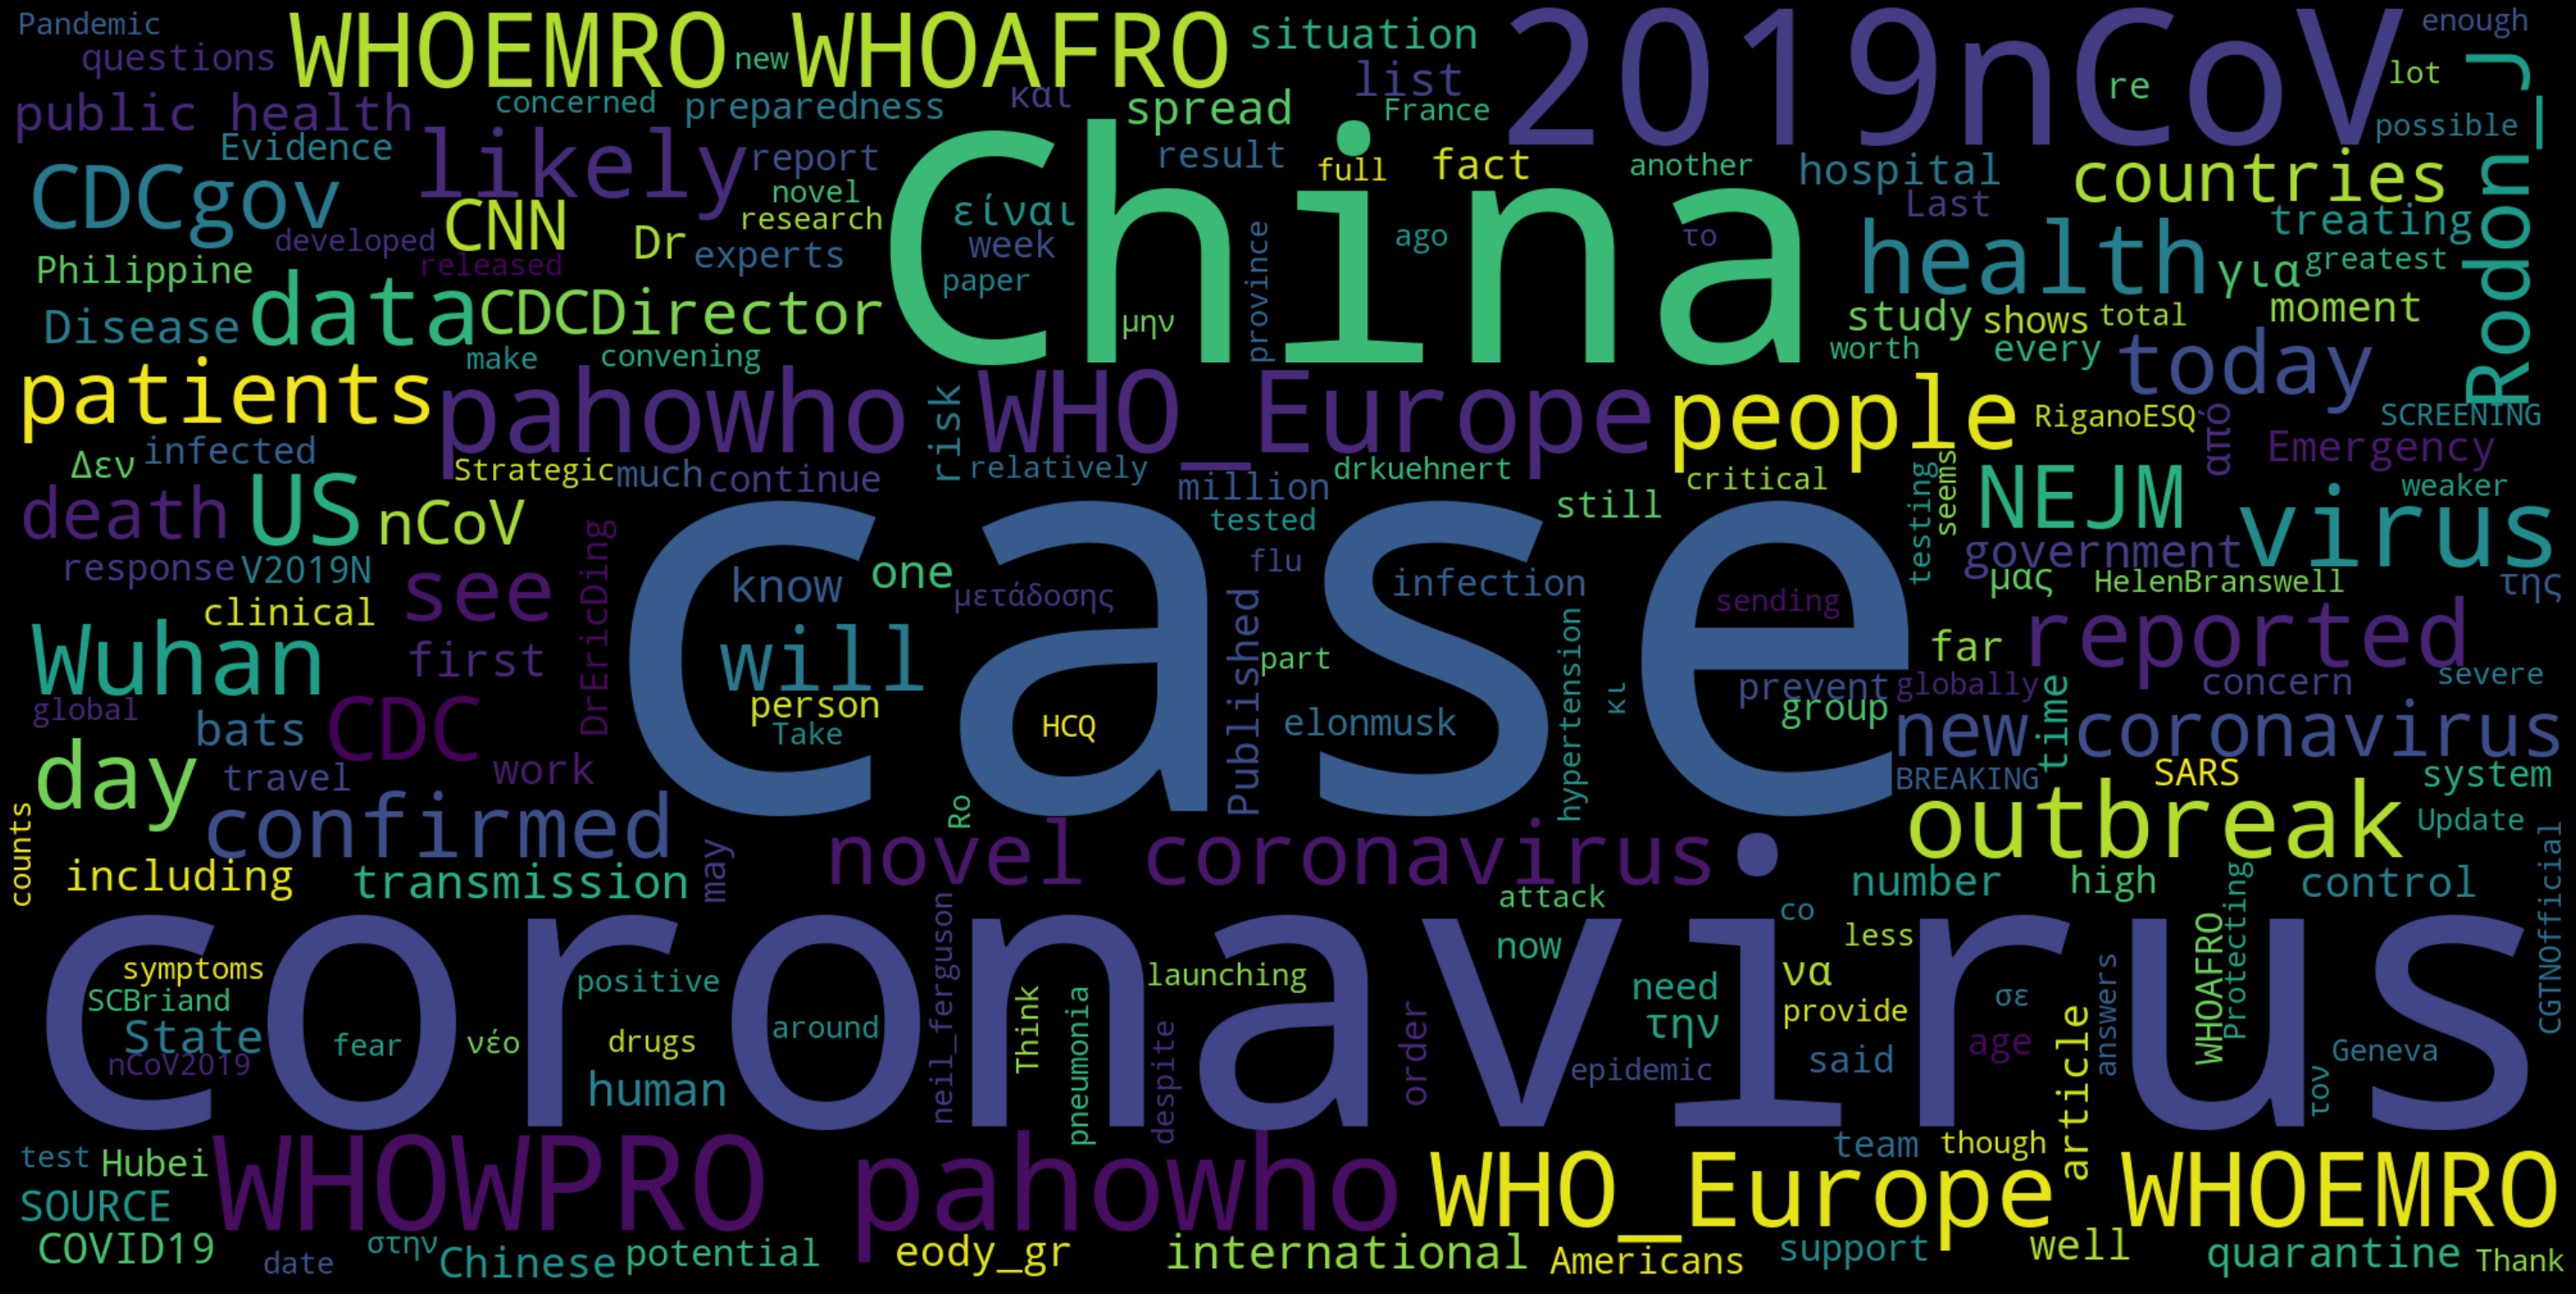

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

text = text.replace('RT', " ")
text = text.replace('whoemro', " ")
text = text.replace('edros', " ")
text = text.replace('whowpro', " ")
text = text.replace('whosearo', " ")
text = text.replace('WHOSEARO', " ")
text = text.replace('https', " ")
text = text.replace('DrTedros'," ")
text = text.replace('DrT'," ")
text = text.replace('Dr T'," ")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_vector = cv.fit_transform(short_tweets['text'])

In [ ]:
import spacy
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 2.5MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp36-none-any.whl size=11422785 sha256=af93a522541402d63858366dd88a3ac0195cc2f40dcb3b1843a626f3026bc0d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-1kfs3azh/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:

nlp = spacy.load('el_core_news_sm')


NameError: ignored

In [ ]:
list(nlp.Defaults.stop_words)[0:10]


['κάμποσου',
 'τούτες',
 'εαυτό',
 'μεμιάς',
 'μόνης',
 'ετέραι',
 'κάποιον',
 'είθε',
 'βέβαια',
 'κάποιαν']

In [ ]:
doc = nlp(short_tweets['text'][1])


In [ ]:
for token in doc:
    print(token, token.lemma_)

RT rt
@PrimeministerGR @primeministergr
: :
Σπάμε σπώ
την την
αλυσίδα αλυσίδα
μετάδοσης μετάδοση
του του
κορονοϊού κορονοϊός
. .
Επιδεικνύουμε επιδεικνύω
ατομική ατομικός
ευθύνη ευθύνη
και και
ακολουθούμε ακολουθούμε
αυστηρά αυστηρά
τις τις
οδηγίες οδηγία
. .
Δεν δεν
συνωσ συνωσ
… …


In [ ]:
' '.join(token.lemma_ for token in doc)


'rt @primeministergr : σπώ την αλυσίδα μετάδοση του κορονοϊός . επιδεικνύω ατομικός ευθύνη και ακολουθούμε αυστηρά τις οδηγία . δεν συνωσ …'

In [ ]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)


In [ ]:
clear_text[200:400]


'κορονοϊός . επιδεικνύω ατομικός ευθύνη και ακολουθούμε αυστηρά τις οδηγία . δεν συνωσ … να μην ξεχάσω την ανθρωπιά μας - είσαι νέος και υγιής - δώσε αίμα - να μην αντιμετωπίσω ελλείψει    και μια αναφ'

In [ ]:
count_vector.shape

(166, 20)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,10,1000,14,15,17,18,19,191,20,200,2019,2019ncov,2020,24,243,25,250,30,31,350,362,363,375,3omdaelkess,40,400,41,49,490,575,584,6000,61,66,675,68,6am,70,7678,...,νεότερα,νωρίς,ξεχάσουμε,οδηγίες,οποίο,παραλαβή,παρασκευή,περίοδο,περισσότερα,πηγής,πούμε,προστασία,ρατσισμός,σε,σπάμε,στα,στεροειδών,στην,στιγμής,συνεχίζουμε,συνωσ,σωστός,σύμμαχοί,σύψα,τα,τετ,την,της,τις,το,τον,του,των,υγείας,υγιής,υπολογισμός,φάρμακο,φίλε,φαρμάκων,χατζάκη
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv.vocabulary_


{'to_pouli_tou_ro': 929,
 'με': 1090,
 'ειδική': 1069,
 'άδεια': 1034,
 'κι': 1081,
 'άτομο': 1035,
 'σε': 1113,
 '1000': 2,
 'τετ': 1125,
 'μέτρα': 1088,
 'αυτός': 1052,
 'είναι': 1066,
 'ρατσισμός': 1112,
 'για': 1056,
 'τον': 1130,
 'οποίο': 1104,
 'μιλάω': 1096,
 'εσείς': 1073,
 'αγαπητέ': 1038,
 'φίλε': 1137,
 'δεν': 1060,
 'καταλαβαίνετε': 1080,
 'rt': 797,
 'primeministergr': 718,
 'σπάμε': 1114,
 'την': 1126,
 'αλυσίδα': 1042,
 'μετάδοσης': 1091,
 'του': 1131,
 'κορονοϊού': 1084,
 'επιδεικνύουμε': 1072,
 'ατομική': 1049,
 'ευθύνη': 1074,
 'και': 1079,
 'ακολουθούμε': 1039,
 'αυστηρά': 1051,
 'τις': 1128,
 'οδηγίες': 1103,
 'συνωσ': 1120,
 'να': 1099,
 'μην': 1093,
 'ξεχάσουμε': 1102,
 'ανθρωπιά': 1044,
 'μας': 1089,
 'είσαι': 1067,
 'νέος': 1098,
 'υγιής': 1134,
 'δώσε': 1065,
 'αίμα': 1037,
 'αντιμετωπίσουμε': 1045,
 'ελλείψεις': 1070,
 'μια': 1095,
 'αναφορά': 1043,
 'στα': 1115,
 'μέσα': 1087,
 'το': 1129,
 'νέο': 1097,
 'φάρμακο': 1136,
 'από': 1048,
 'china': 186,
 'rigano

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)


In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])


In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,10,14,200,2019,2019ncov,24,25,80,about,age,ago,air,all,also,always,am,americans,amp,an,and,another,answers,any,are,around,article,articles,as,at,attack,average,bats,be,because,been,being,breaking,but,by,...,to,today,total,transmission,travel,treating,under,update,us,v2019n,vergaralert,very,virus,was,we,weaker,weeks,well,what,whether,which,while,who,who_europe,whoafro,whoemro,whosearo,whowpro,will,with,work,world,worth,wudong,wuhan,you,your,ypyggr,μετάδοσης,νέο
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατο', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτής', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,...,14-day,200,2019,2019-ncov,2019ncov,25%,80%,@cdcdirector,@cdcgov,@cgtnofficial,@cnn,@cresa_r,@drericding,@drkuehnert,@drtedros,@drtomfrieden,@elonmusk,@eody_gr,@helenbranswell,@machiavelli_gr,@mackayim,@mmurphycuny,@neil_ferguson,@nejm,@pahowho,@quimsegales,@riganoesq,@rodon_j,@scbriand,@v2019n,@vergaralert,@who,@who_europe,@whoafro,@whoemro,@whosearo,@whowpro,@ypyggr,about,...,than,that,the,there,these,think,this,those,though,time,today,total,transmission,travel,treating,under,update,very,virus,was,weaker,weeks,well,we’re,what,whether,which,while,who,will,with,work,world,worth,wudong,wuhan,you,your,μετάδοση,νέος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,2019ncov,and,are,china,coronavirus,drtedros,for,from,in,is,not,of,rt,that,the,this,to,we,who,with
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b' , tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατο', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτής', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,2019ncov,@drtedros,@who,@whoafro,@whosearo,and,are,cases,china,coronavirus,for,from,have,health,not,that,the,this,who,with
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,drtedros we,drtedros who,drtedros whowpro,in the,new coronavirus,novel coronavirus,of the,pahowho who_europe,public health,rt cdcgov,rt drtedros,rt who,the us,there are,who drtedros,who is,who_europe whoemro,whoemro whoafro,whosearo pahowho,whowpro whosearo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)


In [ ]:

sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

rt who          34
who drtedros    31
rt drtedros     16
in the          15
of the          14
dtype: int64

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re


import nltk
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/Tsiodras.tsv", sep='\t', nrows=200)
df

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,0,Sun Mar 22 10:01:59 +0000 2020,1241666424688517121,1241666424688517121,@To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε...,False,"[17, 147]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.241657e+18,1.241657e+18,3.321322e+09,3.321322e+09,To_pouli_tou_Ro,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,False,503,2701,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Fri Mar 20 15:24:02 +0000 2020,1241022696500146178,1241022696500146178,RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,False,1359,0,False,False,el,{'created_at': 'Fri Mar 20 14:32:43 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Thu Mar 19 18:16:01 +0000 2020,1240703588646547456,1240703588646547456,Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος...,False,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,False,1677,4307,False,False,el,NaN,False,NaN,NaN,NaN,NaN,NaN
3,3,Wed Mar 18 17:23:28 +0000 2020,1240327977382088704,1240327977382088704,Και μια αναφορά στα μέσα για το νέο φάρμακο απ...,False,"[0, 79]","{'hashtags': [{'text': 'China', 'indices': [48...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,False,1020,2498,False,False,el,NaN,False,NaN,NaN,NaN,NaN,NaN
4,4,Wed Mar 18 10:25:48 +0000 2020,1240222868211933184,1240222868211933184,RT @RiganoESQ: @elonmusk Update: As per @Dider...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,False,1005,0,False,False,en,{'created_at': 'Tue Mar 17 19:43:48 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,Thu Jan 23 19:25:20 +0000 2020,1220427313214394368,1220427313214394368,"RT @WHO: @DrTedros ""We know that this virus ca...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,False,151,0,False,False,en,{'created_at': 'Thu Jan 23 18:29:55 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
162,162,Thu Jan 23 19:25:13 +0000 2020,1220427283384631298,1220427283384631298,"RT @WHO: @DrTedros ""We know that most of those...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,False,191,0,False,False,en,{'created_at': 'Thu Jan 23 18:30:12 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
163,163,Thu Jan 23 18:13:18 +0000 2020,1220409184073781254,1220409184073781254,Remarkable delay shows uncertainty and more qu...,False,"[0, 197]","{'hashtags': [{'text': 'coronavirus', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 976133904091533312, 'id_str': '97613390...",NaN,NaN,NaN,NaN,True,0,2,False,False,en,NaN,False,NaN,1.220305e+18,1.220305e+18,"{'url': 'https://t.

In [ ]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [ ]:
df.shape
print("Number of articles scraped (before cleaning): ", df.shape[0])


Number of articles scraped (before cleaning):  166


In [ ]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.shape


(166, 32)

In [ ]:
df = df.replace(np.nan, '0')
df

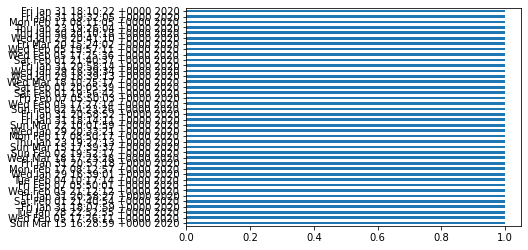

In [ ]:
#df['created_at'].value_counts().head(10)
%matplotlib inline
df['created_at'].value_counts().head(40).sort_values().plot(kind='barh')


In [ ]:
#greek_sentiment_analysis_lexicon

In [ ]:
!python -m spacy download el_core_news_md


     |████████████████████████████████| 132.6MB 1.1MB/s 
  Created wheel for el-core-news-md: filename=el_core_news_md-2.2.5-cp36-none-any.whl size=137053458 sha256=e1ac00a358f0409cd416aa730a963d1b04c97f720d20a139b8fb88e8aa5bfa3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-dsmmsh7y/wheels/e3/70/65/a02c5c86342d8a6d6d25664309af6137a0c514206e96438251
Successfully built el-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
import spacy
from spacy import displacy
import pandas as pd
from collections import defaultdict
import operator

In [ ]:
indexes = {}
df = pd.read_csv('https://raw.githubusercontent.com/cmourlas/DataAnalysisPython/master/lexicons/greek_sentiment_lexicon.tsv',sep='\t')
df = df.fillna('N/A')

In [ ]:
for index, row in df.iterrows():
    df.at[index, "Term"] = row["Term"].split(' ')[0]
    indexes[df.at[index, "Term"]] = index

In [ ]:
text= short_tweets['text'].str.cat(sep = ' ').replace("amp", ' ')

text

'@To_pouli_tou_Ro Με ειδική άδεια κι 1 άτομο σε 1000 τετ μέτρα - αυτός είναι ο ρατσισμός για τον οποίο μιλάω κι εσείς αγαπητέ φίλε δεν καταλαβαίνετε RT @PrimeministerGR: Σπάμε την αλυσίδα μετάδοσης του κορονοϊού. Επιδεικνύουμε ατομική ευθύνη και ακολουθούμε αυστηρά τις οδηγίες. Δεν συνωσ… Να μην ξεχάσουμε την ανθρωπιά μας - είσαι νέος και υγιής - δώσε αίμα - να μην αντιμετωπίσουμε ελλείψεις   Και μια αναφορά στα μέσα για το νέο φάρμακο από #China    RT @RiganoESQ: @elonmusk Update: As per @DiderRaoult - the study shows combination of HCQ * Azithromycin is most effective treatment \n\n1 co… RT @RiganoESQ: @elonmusk I am co-author of the original paper.\n\nWas just on television discussing HCQ, first well controlled study against… RT @elonmusk: Hydroxychloroquine probably better\n  Νεότερα για το θέμα των μη στεροειδών αντιφλεγμονωδών φαρμάκων - still not enough data       RT @BBCWorld: Dutch Health Minister Bruno Bruins announces schools and crèches will be closed from Monday until 6 Ap

In [ ]:
subj_scores = {
    'OBJ': 0,
    'SUBJ-': 0.5,
    'SUBJ+': 1,
}

emotion_scores = {
    'N/A': 0,
    '1.0': 0.2,
    '2.0': 0.4,
    '3.0': 0.6,
    '4.0': 0.8,
    '5.0': 1,
}

polarity_scores = {
    'N/A': 0,
    'BOTH': 0,
    'NEG': -1,
    'POS': 1
}

In [ ]:
nlp = spacy.load('el_core_news_md')
doc = nlp(text)

In [ ]:
subjectivity_score = 0
anger_score = 0
disgust_score = 0
fear_score =  0
happiness_score = 0
sadness_score = 0
surprise_score = 0
polarity_score = 0
matched_tokens = 0
for token in doc:
    lemmatized_token = token.lemma_
    if (lemmatized_token in indexes):
        indx = indexes[lemmatized_token]
        pos_flag = False
        for col in ["POS1", "POS2", "POS3", "POS4"]:
            if (token.pos_ == df.at[indx,col]):
                pos_flag = True
                break
        if (pos_flag == True):
            match_col_index = [int(s) for s in col if s.isdigit()][0]
            subjectivity_score += subj_scores[df.at[indx,'Subjectivity'+str(match_col_index)]]
            anger_score += emotion_scores[str(df.at[indx, 'Anger'+str(match_col_index)])]
            disgust_score += emotion_scores[str(df.at[indx, 'Disgust'+str(match_col_index)])]
            fear_score += emotion_scores[str(df.at[indx, 'Fear'+str(match_col_index)])]
            happiness_score += emotion_scores[str(df.at[indx, 'Happiness'+str(match_col_index)])]
            sadness_score += emotion_scores[str(df.at[indx,'Sadness'+str(match_col_index)])]
            surprise_score += emotion_scores[str(df.at[indx, 'Surprise'+str(match_col_index)])]
            polarity_score += polarity_scores[str(df.at[indx, 'Polarity'+str(match_col_index)])]
            matched_tokens+=1

In [ ]:
try:
    print('Subjectivity: ' + str(subjectivity_score/matched_tokens * 100)+'%')
    emotions = {'anger': anger_score, 'disgust': disgust_score, 'fear':fear_score, 'happiness':happiness_score, 'sadness': sadness_score, 'surprise': surprise_score}
    emotion = max(emotions.items(), key=operator.itemgetter(1))[0]
    if (emotions[emotion] == 0):
        print('Unable to detect emotion')
    else:
        print('Main emotion: ' + emotion + '. Emotion score: ' + str(emotions[emotion]*100/matched_tokens) + '%')
        print('Polarity: ', polarity_score)
except:
    print('No matched tokens')

Subjectivity: 50.0%
Main emotion: anger. Emotion score: 40.0%
Polarity:  -2
